<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [16]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
ds = pd.read_csv('https://raw.githubusercontent.com/scrunts23/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv')
ds.head(3)

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level


In [17]:
ds["description"] = ds["description"].apply(lambda s: " ".join(BeautifulSoup(s, "html.parser").stripped_strings).replace("\\n", " "))
ds.head(3)

,Unnamed: 0,description,title
0,0,"b"" Job Requirements: Conceptual understanding...",Data scientist
1,1,"b' Job Description As a Data Scientist 1, ...",Data Scientist I
2,2,b' As a Data Scientist you will be working on ...,Data Scientist - Entry Level


## 2) Use Spacy to tokenize the listings 

In [24]:
from spacy.lang.en import English
from spacy.tokenizer import Tokenizer
spacy.load("en_core_web_lg")

nlp = English()
tokenizer = Tokenizer(nlp.vocab)

tokens = []
for doc in tokenizer.pipe(ds['description'], batch_size=500):
    doc_tokens = [
        re.sub(r"[^a-z0-9]", '', t.lemma_.lower()).strip() for t in doc
        if not t.is_stop and not t.is_punct and t.text.strip()
    ]
    tokens.append(" ".join(doc_tokens))

ds['tokens'] = tokens

In [25]:
ds['tokens'].head(3)

0    b job requirements conceptual understanding ma...
1    b job description data scientist 1 help build ...
2    b data scientist working consulting business r...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [38]:
vect = CountVectorizer()
dtm = vect.fit_transform(ds["tokens"])

In [39]:
dtm

<426x9819 sparse matrix of type '<class 'numpy.int64'>'
	with 93105 stored elements in Compressed Sparse Row format>

In [40]:
type(dtm.todense())

numpy.matrix

## 4) Visualize the most common word counts

In [59]:
from collections import Counter

counts = Counter()
for row in ds['tokens']:
    counts.update(row.split(" "))

print(counts.most_common(20))

[('data', 4278), ('experience', 1874), ('business', 1185), ('work', 1144), ('team', 963), ('science', 934), ('learning', 900), ('analytics', 719), ('skills', 686), ('machine', 683), ('analysis', 677), ('models', 614), ('product', 569), ('statistical', 562), ('solutions', 528), ('new', 527), ('ability', 520), ('scientist', 495), ('insights', 462), ('help', 456)]


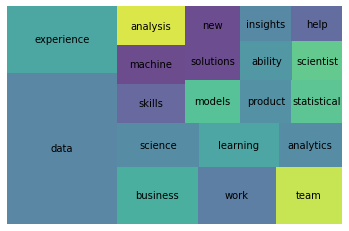

In [60]:
import squarify
import matplotlib.pyplot as plt

mc = counts.most_common(20)
squarify.plot(sizes=[c for w, c in mc], label=[w for w, c in mc], alpha=.8)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 